In [ ]:
#🔹 1. Import ไลบรารีที่จำเป็น
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
# 2. อ่านไฟล์ CSV (📂) และแสดงข้อมูลเบื้องต้น
file_path = "../DataSet/Historical-data-ACF7-SPU.xlsx"
df = pd.read_excel(file_path)

c:\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
#🛠 ดูโครงสร้างของข้อมูล
print("🔍 ตัวอย่างข้อมูลจากไฟล์ CSV")
print(df.head())

🔍 ตัวอย่างข้อมูลจากไฟล์ CSV
  Data type                 Asset number                   Asset name  System  \
0    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
1    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
2    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
3    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
4    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   

  Install location                                            Content  \
0           office  BLATN AIR QUALITY:133;Temp:31.6celsius;humid:6...   
1           office  BLATN AIR QUALITY:133;Temp:31.5celsius;humid:6...   
2           office  BLATN AIR QUALITY:133;Temp:31.5celsius;humid:6...   
3           office  BLATN AIR QUALITY:133;Temp:31.5celsius;humid:6...   
4           office  BLATN AIR QUALITY:133;Temp:31.2celsius;humid:6...   

           Device type Device ID Project      

In [ ]:
# แสดงรายชื่อคอลัมน์ทั้งหมด
print("\n📑 คอลัมน์ที่มีในข้อมูล:")
print(", ".join(df.columns))  # แสดงชื่อคอลัมน์ทั้งหมดในบรรทัดเดียว

#📌ดูจำนวนแถวและคอลัมน์ในชุดข้อมูล
print(f"\n📑 ข้อมูลนี้มีทั้งหมด {df.shape[0]} แถว และ {df.shape[1]} คอลัมน์")


📑 คอลัมน์ที่มีในข้อมูล:
Data type, Asset number, Asset name, System, Install location, Content, Device type, Device ID, Project, Report time

📑 ข้อมูลนี้มีทั้งหมด 57615 แถว และ 10 คอลัมน์


In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame
print("\n📌 รายละเอียดของชุดข้อมูล:")
print(df.info())


📌 รายละเอียดของชุดข้อมูล:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57615 entries, 0 to 57614
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Data type         57615 non-null  object
 1   Asset number      57615 non-null  object
 2   Asset name        57615 non-null  object
 3   System            57615 non-null  object
 4   Install location  57615 non-null  object
 5   Content           57615 non-null  object
 6   Device type       57615 non-null  object
 7   Device ID         57615 non-null  object
 8   Project           57615 non-null  object
 9   Report time       57615 non-null  object
dtypes: object(10)
memory usage: 4.4+ MB
None


In [ ]:
#🔹 3. ตรวจสอบและจัดรูปแบบคอลัมน์ที่เกี่ยวข้องกับเวลา
# แปลง 'Report time' เป็น datetime
df['Report time'] = pd.to_datetime(df['Report time'], errors='coerce')

#ตรวจสอบช่วงเวลาของข้อมูล
print("\n📌 ข้อมูลเริ่มต้นและล่าสุด:")
print("📅 เริ่มต้น: ", df['Report time'].min())
print("📅 ล่าสุด: ", df['Report time'].max())

# สร้างคอลัมน์ 'Date' และ 'Time'
df['Date'] = df['Report time'].dt.date
df['Time'] = df['Report time'].dt.time

# นับจำนวนแถวในแต่ละวัน
daily_data_count = df.groupby('Date').size()
print("📌 จำนวนการเก็บข้อมูลในแต่ละวัน:")
print(daily_data_count)

# แสดงจำนวนข้อมูลทั้งหมดในช่วงเวลาที่ระบุ
start_date = pd.to_datetime('2025-01-09 11:38:42')
end_date = pd.to_datetime('2025-03-12 09:24:40')

# กรองข้อมูลในช่วงเวลา
filtered_data = df[(df['Report time'] >= start_date) & (df['Report time'] <= end_date)]

# นับจำนวนการเก็บข้อมูลในช่วงเวลาดังกล่าว
filtered_daily_count = filtered_data.groupby('Date').size()


📌 ข้อมูลเริ่มต้นและล่าสุด:
📅 เริ่มต้น:  2025-01-09 11:38:42
📅 ล่าสุด:  2025-03-12 09:24:40
📌 จำนวนการเก็บข้อมูลในแต่ละวัน:
Date
2025-01-09      59
2025-01-10       1
2025-01-31     525
2025-02-01    1457
2025-02-02    1444
2025-02-03    1451
2025-02-04    1444
2025-02-05    1438
2025-02-06    1451
2025-02-07    1453
2025-02-08    1447
2025-02-09    1444
2025-02-10    1444
2025-02-11    1448
2025-02-12    1446
2025-02-13    1445
2025-02-14    1444
2025-02-15    1449
2025-02-16    1444
2025-02-17    1447
2025-02-18    1446
2025-02-19    1444
2025-02-20    1448
2025-02-21    1455
2025-02-22    1448
2025-02-23    1446
2025-02-24    1446
2025-02-25    1454
2025-02-26    1449
2025-02-27    1450
2025-02-28    1462
2025-03-01    1450
2025-03-02    1447
2025-03-03    1447
2025-03-04    1446
2025-03-05    1449
2025-03-06    1448
2025-03-07    1447
2025-03-08    1444
2025-03-09    1444
2025-03-10    1446
2025-03-11    1459
2025-03-12     559
dtype: int64


In [ ]:
#🔹 4. ตรวจสอบค่าซ้ำและค่าหายไป
# ตรวจสอบค่าซ้ำใน 'Device ID'
print("\n📌 จำนวนค่าซ้ำใน Device ID:")
print(df['Device ID'].value_counts().head(10))

# ตรวจสอบค่า NaN
print("\n🔍 จำนวนค่า NaN ในแต่ละคอลัมน์:")
print(df.isnull().sum())


📌 จำนวนค่าซ้ำใน Device ID:
Device ID
4f05acf7    57615
Name: count, dtype: int64

🔍 จำนวนค่า NaN ในแต่ละคอลัมน์:
Data type           0
Asset number        0
Asset name          0
System              0
Install location    0
Content             0
Device type         0
Device ID           0
Project             0
Report time         0
Date                0
Time                0
dtype: int64


In [ ]:
#🔹 5. ตรวจหาข้อมูลที่ไม่ถูกต้องใน 'Content' และลบออก
# คำที่บ่งบอกว่าข้อมูลไม่ถูกต้อง
abnormal_values = ['Voltage', 'Version', 'Address', 'Acquisition failure', 'Offline', 'Set control command']

# นับจำนวนข้อมูลที่ผิดปกติ
total_abnormal_count = sum(df['Content'].str.contains('|'.join(abnormal_values), case=False, na=False))

# แสดงจำนวนแถวที่พบข้อมูลผิดปกติ
print("\n📌 Content มีค่าที่ไม่ปกติ")
for value in abnormal_values:
    count = df['Content'].str.contains(value, case=False, na=False).sum()
    print(f'🔍 จำนวนแถวที่พบ "{value}": {count}')
print(f'🔍 จำนวนแถวที่พบคำผิดปกติทั้งหมด: {total_abnormal_count}')


📌 Content มีค่าที่ไม่ปกติ
🔍 จำนวนแถวที่พบ "Voltage": 222
🔍 จำนวนแถวที่พบ "Version": 30
🔍 จำนวนแถวที่พบ "Address": 1
🔍 จำนวนแถวที่พบ "Acquisition failure": 3
🔍 จำนวนแถวที่พบ "Offline": 1
🔍 จำนวนแถวที่พบ "Set control command": 1
🔍 จำนวนแถวที่พบคำผิดปกติทั้งหมด: 258


In [ ]:
# ลบแถวที่มีข้อมูลผิดปกติ
df_cleaned = df[~df['Content'].str.contains('|'.join(abnormal_values), case=False, na=False)]
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 57357 entries, 0 to 57613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data type         57357 non-null  object        
 1   Asset number      57357 non-null  object        
 2   Asset name        57357 non-null  object        
 3   System            57357 non-null  object        
 4   Install location  57357 non-null  object        
 5   Content           57357 non-null  object        
 6   Device type       57357 non-null  object        
 7   Device ID         57357 non-null  object        
 8   Project           57357 non-null  object        
 9   Report time       57357 non-null  datetime64[ns]
 10  Date              57357 non-null  object        
 11  Time              57357 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 5.7+ MB
None


In [ ]:
#🔹 6. แยกค่าข้อมูลจาก 'Content' และจัดรูปแบบข้อมูล
#🛠 แยกค่าข้อมูลในคอลัมน์ Content
df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']] = df['Content'].str.extract(
    r'AIR QUALITY:(\d+).*?Temp:(\d+\.\d+)celsius.*?humid:(\d+\.\d+)%RH.*?PM2.5:(\d+)ug/m3.*?VOC:(\d+\.\d+)mg/m3.*?CO2:(\d+)PPM.*?HCHO:(\d+\.\d+)mg/m3'
)

#🔄 แปลงข้อมูลตัวเลขให้อยู่ในรูป float หรือ int
df_cleaned[['AQI', 'PM2.5', 'CO2']] = df_cleaned[['AQI', 'PM2.5', 'CO2']].astype(int)
df_cleaned[['Temp', 'Humidity', 'VOC', 'HCHO']] = df_cleaned[['Temp', 'Humidity', 'VOC', 'HCHO']].astype(float)

#🚀 ลบคอลัมน์ Content ออก (ถ้าไม่ต้องการใช้ต่อ)
df_cleaned.drop(columns=['Content'], inplace=True)

<ipython-input-20-ace80679e39d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']] = df['Content'].str.extract(
<ipython-input-20-ace80679e39d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']] = df['Content'].str.extract(
<ipython-input-20-ace80679e39d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [ ]:
#🔍ตรวจสอบผลลัพธ์
print(df_cleaned.head())

  Data type                 Asset number                   Asset name  System  \
0    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
1    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
2    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
3    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   
4    Normal  BLATN outdo\\or air Quality  BLATN outdo\\or air Quality  Others   

  Install location          Device type Device ID Project         Report time  \
0           office  485 Metering Module  4f05acf7     SPU 2025-03-12 09:24:40   
1           office  485 Metering Module  4f05acf7     SPU 2025-03-12 09:23:40   
2           office  485 Metering Module  4f05acf7     SPU 2025-03-12 09:23:12   
3           office  485 Metering Module  4f05acf7     SPU 2025-03-12 09:23:11   
4           office  485 Metering Module  4f05acf7     SPU 2025-03-12 09:12:40   

         Date      Time  A

In [ ]:
print("\n📌 รายละเอียดของชุดข้อมูล:")
print(df_cleaned.info())


📌 รายละเอียดของชุดข้อมูล:
<class 'pandas.core.frame.DataFrame'>
Index: 57357 entries, 0 to 57613
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data type         57357 non-null  object        
 1   Asset number      57357 non-null  object        
 2   Asset name        57357 non-null  object        
 3   System            57357 non-null  object        
 4   Install location  57357 non-null  object        
 5   Device type       57357 non-null  object        
 6   Device ID         57357 non-null  object        
 7   Project           57357 non-null  object        
 8   Report time       57357 non-null  datetime64[ns]
 9   Date              57357 non-null  object        
 10  Time              57357 non-null  object        
 11  AQI               57357 non-null  int64         
 12  Temp              57357 non-null  float64       
 13  Humidity          57357 non-null  float64       
 14  

           AQI          Temp      Humidity         PM2.5           VOC  \
count  57357.0  57357.000000  57357.000000  57357.000000  57357.000000   
mean     133.0     30.052192     65.319468     33.023083      0.330720   
std        0.0      4.490884     16.447592     15.493817      0.144983   
min      133.0     20.500000      0.000000      3.000000      0.150000   
25%      133.0     27.200000     53.400000     20.000000      0.220000   
50%      133.0     28.900000     67.300000     33.000000      0.300000   
75%      133.0     32.100000     79.100000     44.000000      0.400000   
max      133.0     70.700000     97.300000    141.000000      1.550000   

                CO2          HCHO  
count  57357.000000  57357.000000  
mean     423.474990      0.013657  
std       42.993089      0.003771  
min      400.000000      0.008000  
25%      405.000000      0.012000  
50%      416.000000      0.013000  
75%      433.000000      0.014000  
max     1767.000000      0.113000  
Empty Dat

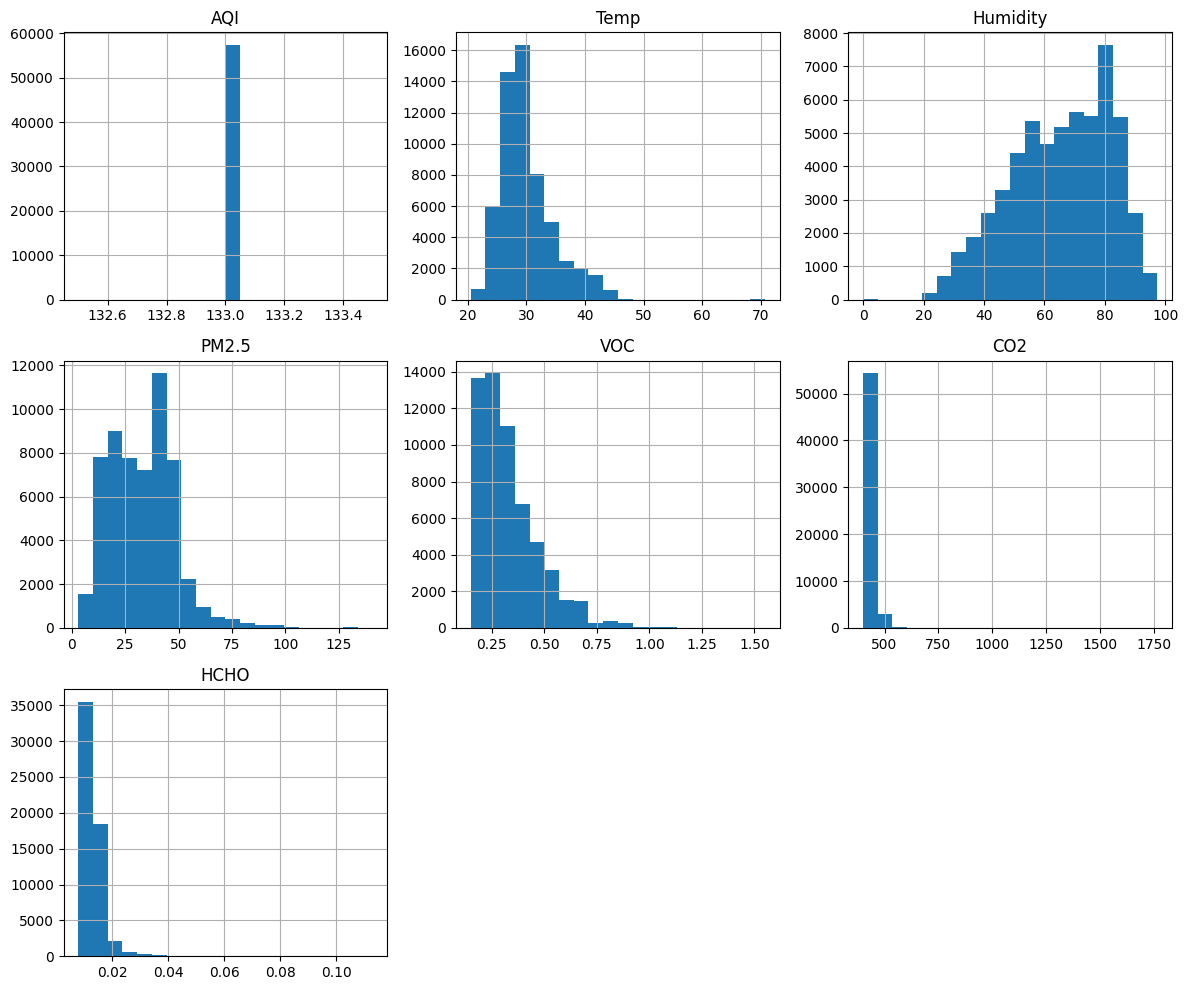

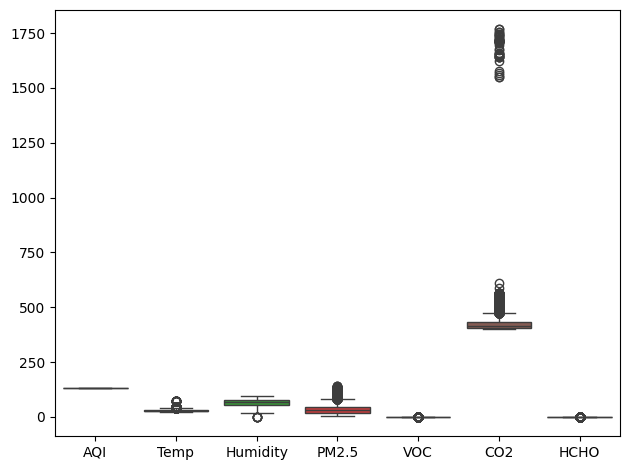

In [ ]:
#🔸 7. ตรวจสอบค่าผิดปกติและวิเคราะห์ข้อมูล
# แสดงสถิติของตัวแปรหลัก
print(df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']].describe())

# ตรวจสอบค่าที่ผิดปกติ
print(df_cleaned[df_cleaned['AQI'] > 500])  # ค่าของ AQI ที่สูงเกินไป (ถ้ามี)

#🔸ตรวจสอบการกระจายตัวของข้อมูล
# Histogram
df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplot
sns.boxplot(data=df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']])
plt.tight_layout()
plt.show()

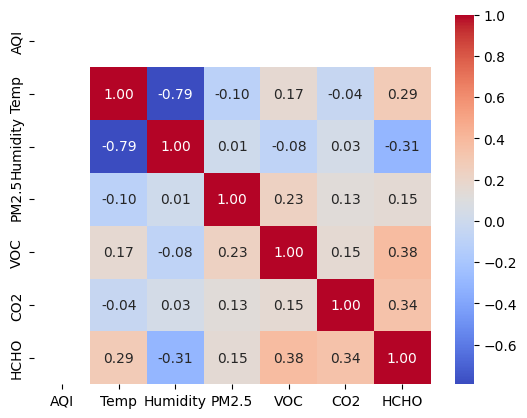

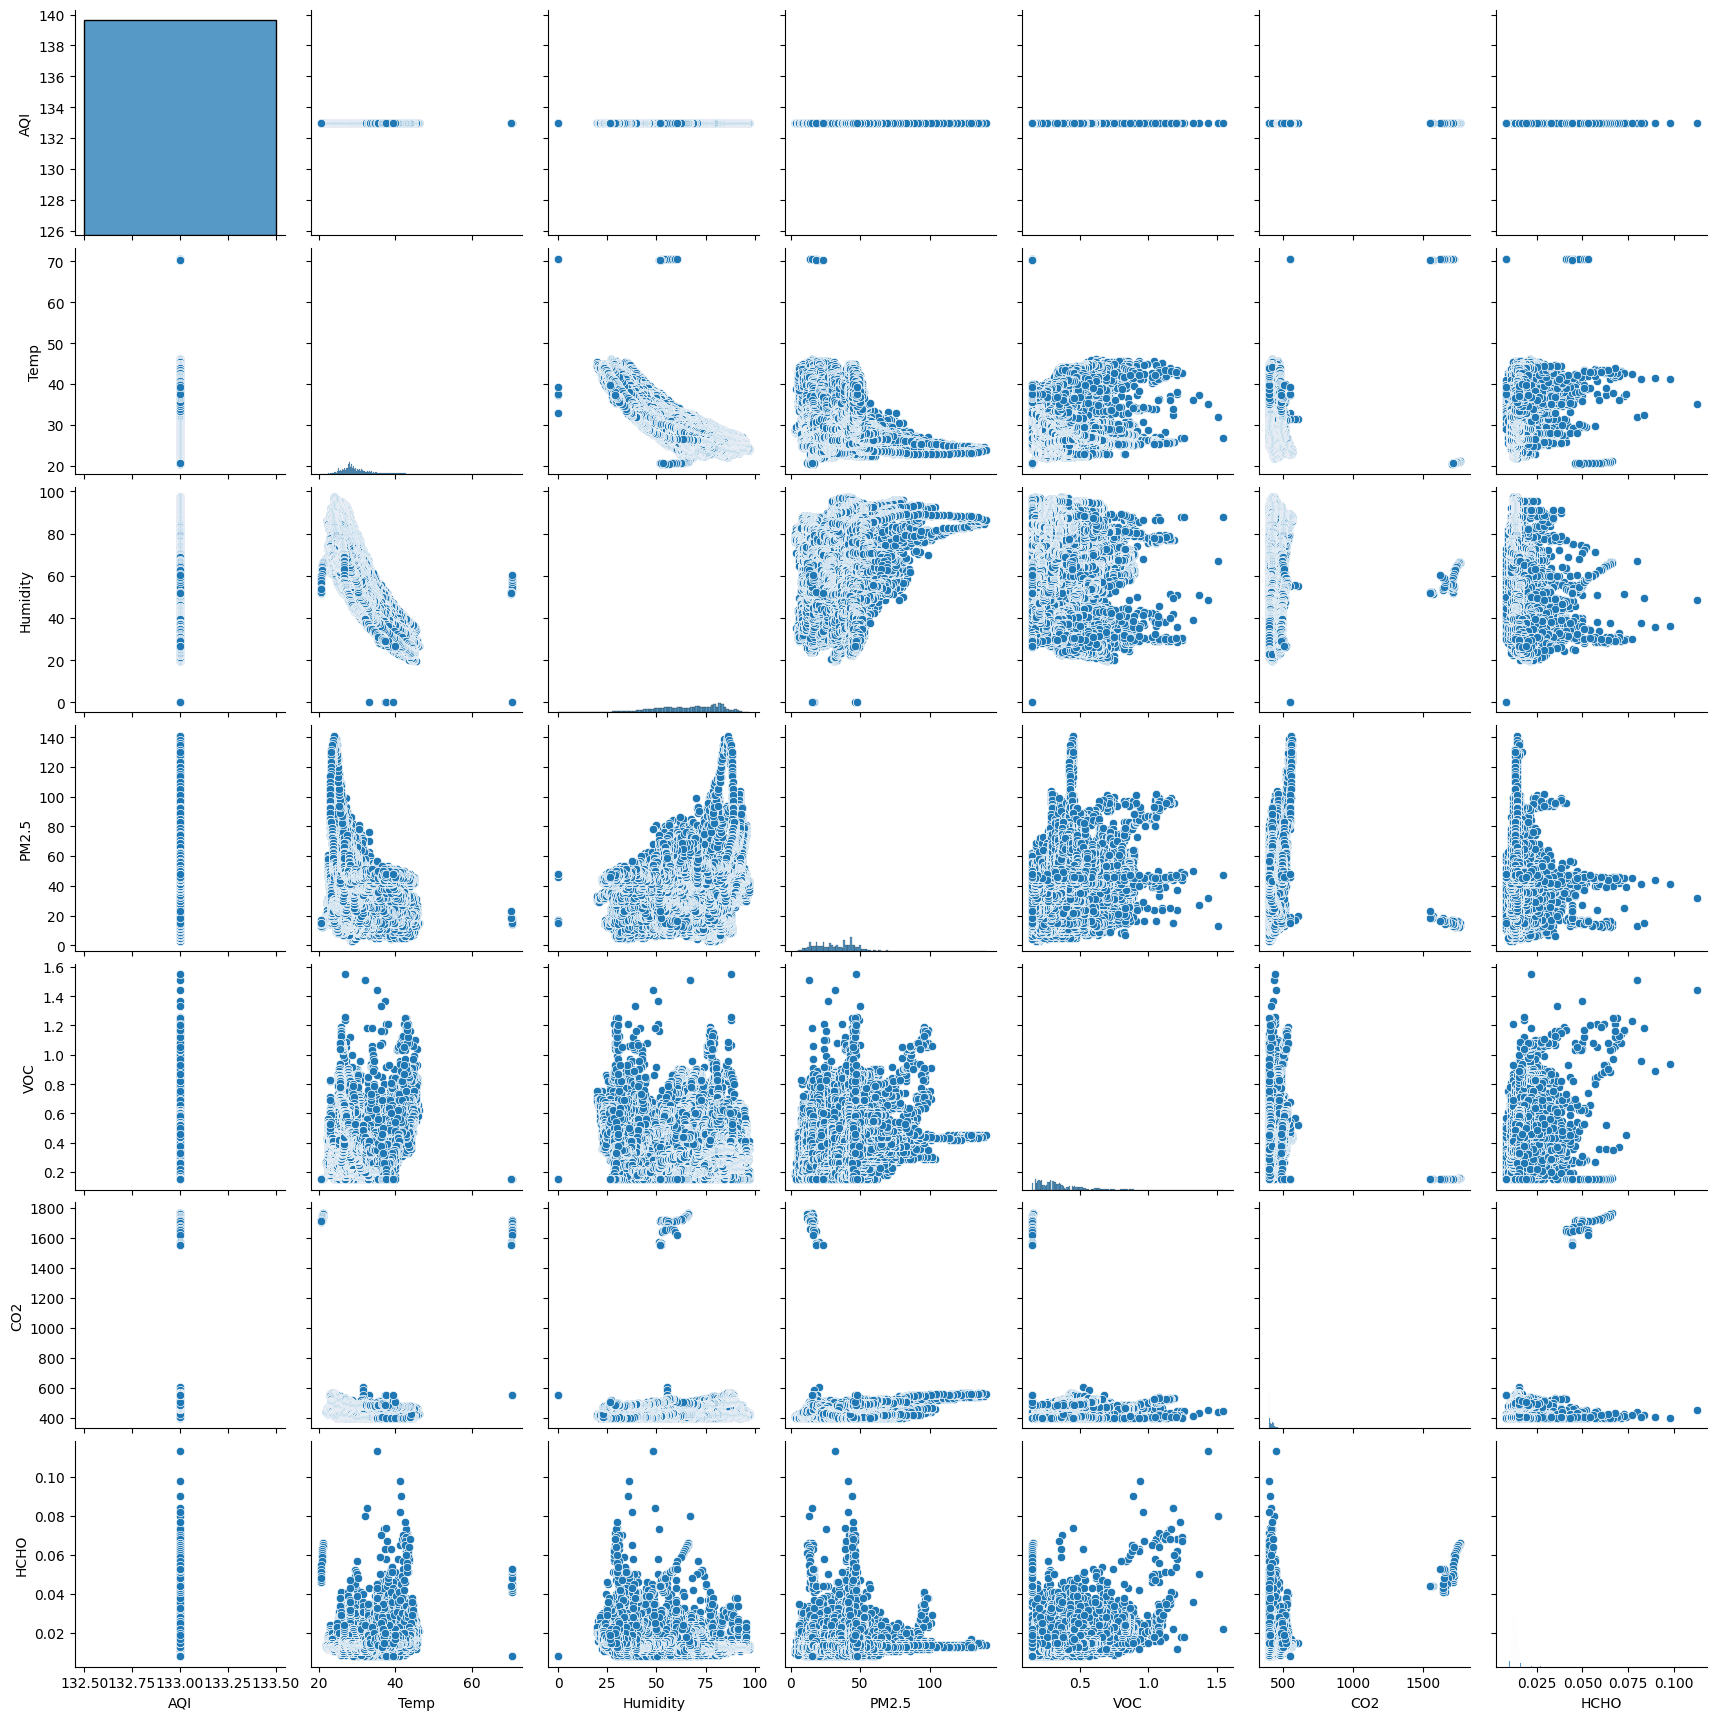

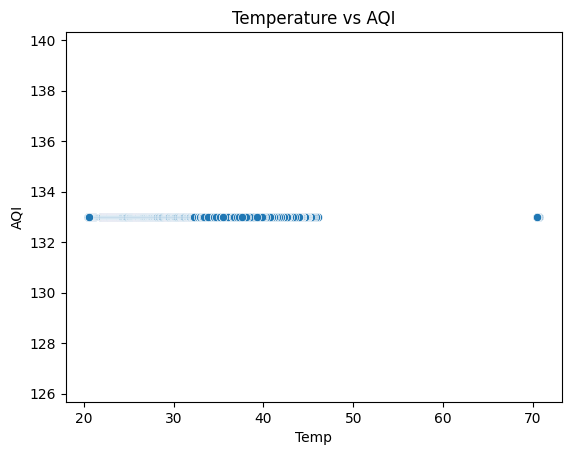

In [ ]:
#🔹 8. ตรวจสอบความสัมพันธ์ของตัวแปร
# Heatmap ของ Correlation Matrix
correlation = df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Pairplot
sns.pairplot(df_cleaned[['AQI', 'Temp', 'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO']])
plt.show()

# สร้าง Scatter plot เพื่อดูความสัมพันธ์ระหว่าง AQI และ Temp
sns.scatterplot(x='Temp', y='AQI', data=df_cleaned)
plt.title('Temperature vs AQI')
plt.show()

In [ ]:
#🔹 9. จัดรูปแบบคอลัมน์ และจัดเรียงใหม่
# แปลงคอลัมน์ที่เป็น category
df_cleaned[['Device ID', 'Asset number', 'Asset name', 'Install location']] = df_cleaned[['Device ID', 'Asset number', 'Asset name', 'Install location']].astype('category')

# แปลงคอลัมน์ 'Date' ให้เป็น datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# แปลงคอลัมน์ 'Time' ให้เป็น datetime.time
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S').dt.time

# จัดเรียงคอลัมน์
df_cleaned = df_cleaned[['Report time', 'Date', 'Time', 'Device ID', 'AQI', 'Temp', 
                         'Humidity', 'PM2.5', 'VOC', 'CO2', 'HCHO', 'Device type', 
                         'Project', 'Data type', 'Asset number', 'Asset name', 'System', 
                         'Install location']]

<ipython-input-32-6a3d8db9337e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Device ID', 'Asset number', 'Asset name', 'Install location']] = df_cleaned[['Device ID', 'Asset number', 'Asset name', 'Install location']].astype('category')
<ipython-input-32-6a3d8db9337e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
<ipython-input-32-6a3d8db9337e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
# แสดงข้อมูลเบื้องต้น
print("\n📌 รายละเอียดของชุดข้อมูล:")
print(df_cleaned.info())

# แสดงรายชื่อคอลัมน์ทั้งหมด
print("\n📑 คอลัมน์ที่มีในข้อมูล:")
print(", ".join(df_cleaned.columns))


📌 รายละเอียดของชุดข้อมูล:
<class 'pandas.core.frame.DataFrame'>
Index: 57357 entries, 0 to 57613
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Report time       57357 non-null  datetime64[ns]
 1   Date              57357 non-null  datetime64[ns]
 2   Time              57357 non-null  object        
 3   Device ID         57357 non-null  category      
 4   AQI               57357 non-null  int64         
 5   Temp              57357 non-null  float64       
 6   Humidity          57357 non-null  float64       
 7   PM2.5             57357 non-null  int64         
 8   VOC               57357 non-null  float64       
 9   CO2               57357 non-null  int64         
 10  HCHO              57357 non-null  float64       
 11  Device type       57357 non-null  object        
 12  Project           57357 non-null  object        
 13  Data type         57357 non-null  object        
 14  